In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns



In [73]:
df = pd.read_csv("Loan_Default.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [74]:
# List of columns to drop
columns_to_drop = [
    'rate_of_interest', 'year', 'Upfront_charges', 'Neg_ammortization', 'interest_only',
    'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by',
    'LTV', 'dtir1', 'approv_in_adv', 'open_credit', 'co-applicant_credit_type', 'submission_of_application', 'total_units', 'Interest_rate_spread'
]

# Drop the specified columns from the DataFrame
df = df.drop(columns=columns_to_drop)
df


,ID,loan_limit,Gender,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,term,property_value,income,credit_type,Credit_Score,age,Region,Security_Type,Status
0,24890,cf,Sex Not Available,type1,p1,l1,nob/c,116500,360.0,118000.0,1740.0,EXP,758,25-34,south,direct,1
1,24891,cf,Male,type2,p1,l1,b/c,206500,360.0,NaN,4980.0,EQUI,552,55-64,North,direct,1
2,24892,cf,Male,type1,p1,l1,nob/c,406500,360.0,508000.0,9480.0,EXP,834,35-44,south,direct,0
3,24893,cf,Male,type1,p4,l1,nob/c,456500,360.0,658000.0,11880.0,EXP,587,45-54,North,direct,0
4,24894,cf,Joint,type1,p1,l1,nob/c,696500,360.0,758000.0,10440.0,CRIF,602,25-34,North,direct,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,cf,Sex Not Available,type1,p3,l1,nob/c,436500,180.0,608000.0,7860.0,CIB,659,55-64,south,direct,0
148666,173556,cf,Male,type1,p1,l1,nob/c,586500,360.0,788000.0,7140.0,CIB,569,25-34,south,direct,0
148667,173557,cf,Male,type1,p4,l1,nob/c,446500,180.0,728000.0,6900.0,CIB,702,45-54,North,direct,0
148668,173558,cf,Female,type1,p4,l1,nob/c,196500,180.0,278000.0,7140.0,EXP,737,55-64,North,direct,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      148670 non-null  int64  
 1   loan_limit              145326 non-null  object 
 2   Gender                  148670 non-null  object 
 3   loan_type               148670 non-null  object 
 4   loan_purpose            148536 non-null  object 
 5   Credit_Worthiness       148670 non-null  object 
 6   business_or_commercial  148670 non-null  object 
 7   loan_amount             148670 non-null  int64  
 8   term                    148629 non-null  float64
 9   property_value          133572 non-null  float64
 10  income                  139520 non-null  float64
 11  credit_type             148670 non-null  object 
 12  Credit_Score            148670 non-null  int64  
 13  age                     148470 non-null  object 
 14  Region              

In [76]:
# Function to categorize status
def categorize_risk(row):
    if row['Status'] == 0:
        return 'Low Risk'
    elif row['Status'] == 1:
        return 'High Risk'

# Apply the function to create a new 'risk_category' column
df['risk_category'] = df.apply(categorize_risk, axis=1)
df


,ID,loan_limit,Gender,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,term,property_value,income,credit_type,Credit_Score,age,Region,Security_Type,Status,risk_category
0,24890,cf,Sex Not Available,type1,p1,l1,nob/c,116500,360.0,118000.0,1740.0,EXP,758,25-34,south,direct,1,High Risk
1,24891,cf,Male,type2,p1,l1,b/c,206500,360.0,NaN,4980.0,EQUI,552,55-64,North,direct,1,High Risk
2,24892,cf,Male,type1,p1,l1,nob/c,406500,360.0,508000.0,9480.0,EXP,834,35-44,south,direct,0,Low Risk
3,24893,cf,Male,type1,p4,l1,nob/c,456500,360.0,658000.0,11880.0,EXP,587,45-54,North,direct,0,Low Risk
4,24894,cf,Joint,type1,p1,l1,nob/c,696500,360.0,758000.0,10440.0,CRIF,602,25-34,North,direct,0,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,cf,Sex Not Available,type1,p3,l1,nob/c,436500,180.0,608000.0,7860.0,CIB,659,55-64,south,direct,0,Low Risk
148666,173556,cf,Male,type1,p1,l1,nob/c,586500,360.0,788000.0,7140.0,CIB,569,25-34,south,direct,0,Low Risk
148667,173557,cf,Male,type1,p4,l1,nob/c,446500,180.0,728000.0,6900.0,CIB,702,45-54,North,direct,0,Low Risk
148668,173558,cf,Female,type1,p4,l1,nob/c,196500,180.0,278000.0,7140.0,EXP,737,55-64,North,direct,0,Low Risk


In [77]:
df = df.drop(columns=["Status"])

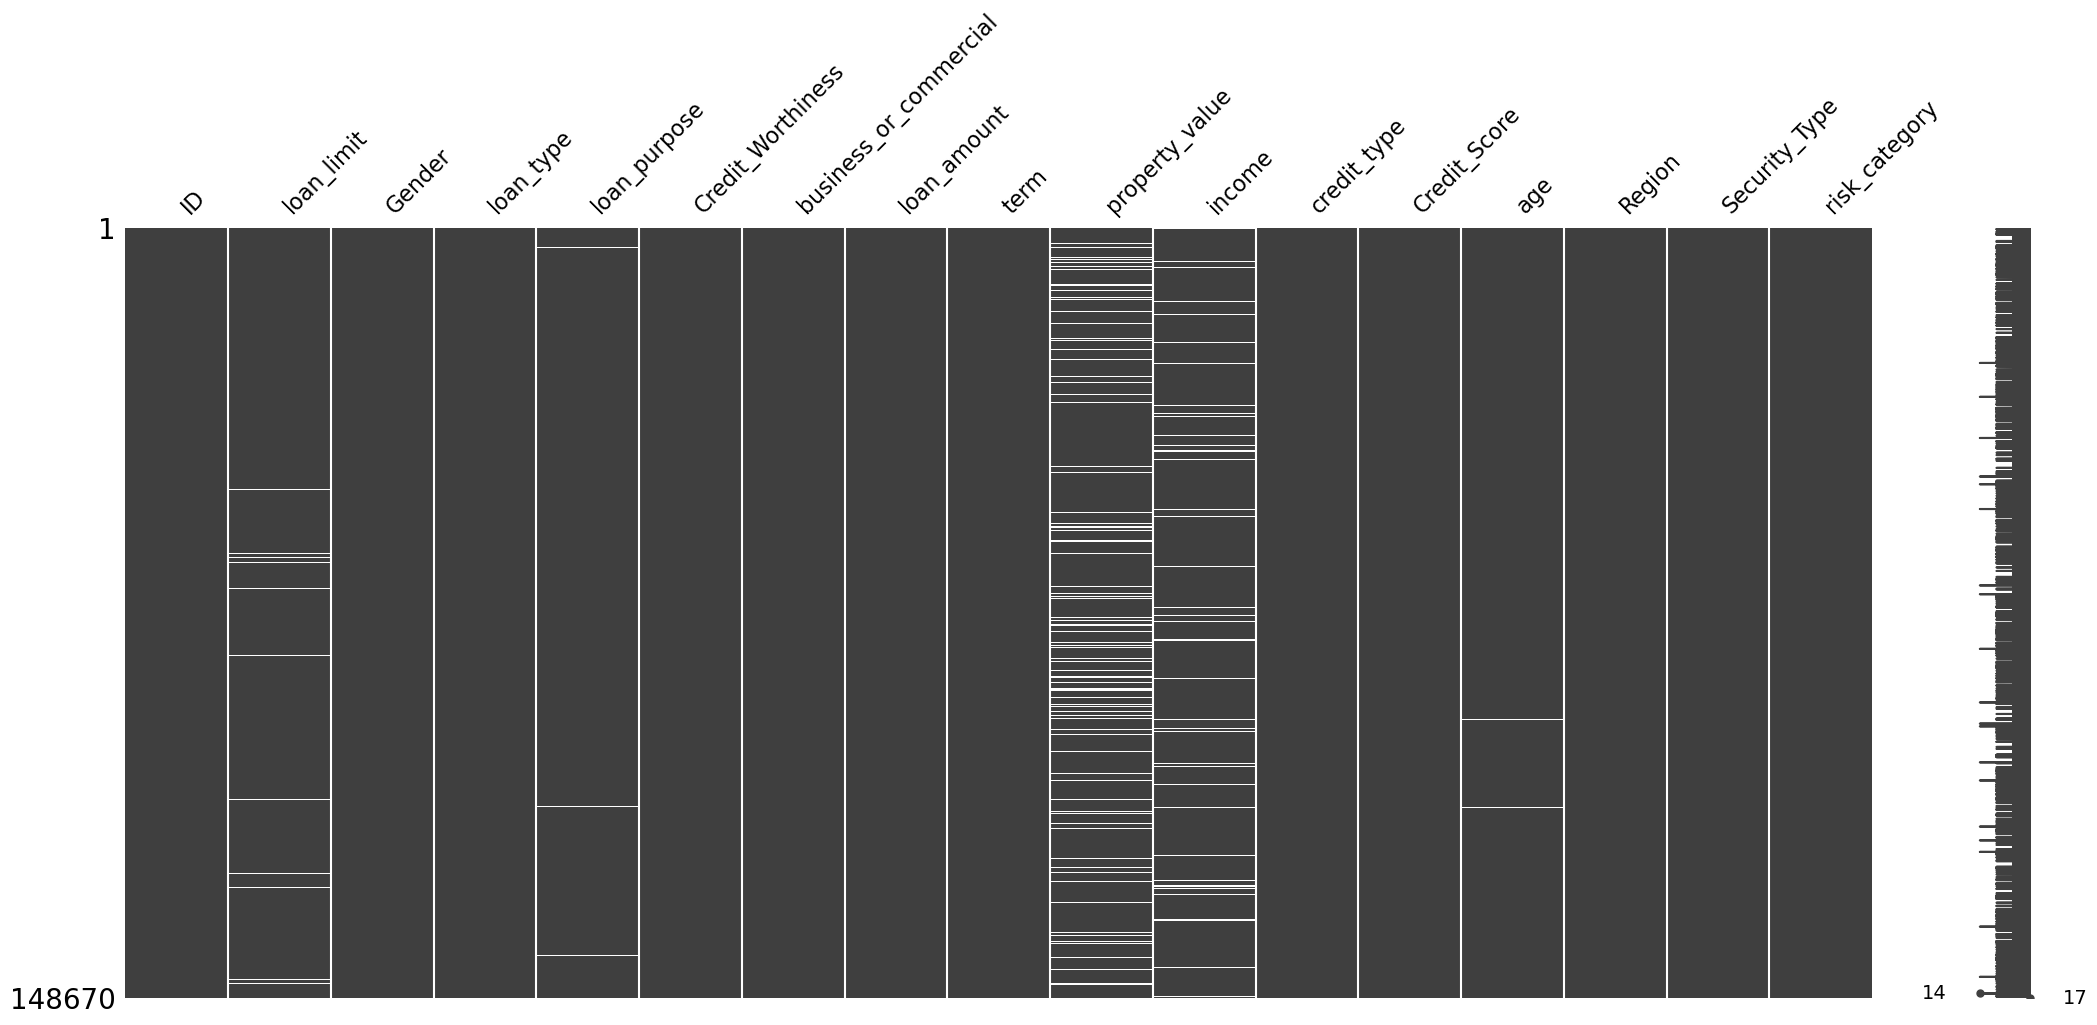

<Figure size 1500x900 with 0 Axes>

In [78]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

In [79]:
df.describe()

,ID,loan_amount,term,property_value,income,Credit_Score
count,148670.000000,1.486700e+05,148629.000000,1.335720e+05,139520.000000,148670.000000
mean,99224.500000,3.311177e+05,335.136582,4.978935e+05,6957.338876,699.789103
std,42917.476598,1.839093e+05,58.409084,3.599353e+05,6496.586382,115.875857
min,24890.000000,1.650000e+04,96.000000,8.000000e+03,0.000000,500.000000
25%,62057.250000,1.965000e+05,360.000000,2.680000e+05,3720.000000,599.000000
50%,99224.500000,2.965000e+05,360.000000,4.180000e+05,5760.000000,699.000000
75%,136391.750000,4.365000e+05,360.000000,6.280000e+05,8520.000000,800.000000
max,173559.000000,3.576500e+06,360.000000,1.650800e+07,578580.000000,900.000000


In [80]:
Features_with_NaN=[col for col in df.columns if df[col].isnull().sum()>0]
for column in Features_with_NaN:
    print(column,np.round(df[column].isnull().mean(),2),'% missing values')

loan_limit 0.02 % missing values
loan_purpose 0.0 % missing values
term 0.0 % missing values
property_value 0.1 % missing values
income 0.06 % missing values
age 0.0 % missing values


In [81]:
df.nunique()

ID                        148670
loan_limit                     2
Gender                         4
loan_type                      3
loan_purpose                   4
Credit_Worthiness              2
business_or_commercial         2
loan_amount                  211
term                          26
property_value               385
income                      1001
credit_type                    4
Credit_Score                 401
age                            7
Region                         4
Security_Type                  2
risk_category                  2
dtype: int64

In [82]:
def count_unique_values(data):
    objects = data.select_dtypes(include=['object']).columns
    for col in objects:
        unique = data[col].value_counts()
        print(unique, '\n')
        print('*'*50)
count_unique_values(df)

cf     135348
ncf      9978
Name: loan_limit, dtype: int64 

**************************************************
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: Gender, dtype: int64 

**************************************************
type1    113173
type2     20762
type3     14735
Name: loan_type, dtype: int64 

**************************************************
p3    55934
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64 

**************************************************
l1    142344
l2      6326
Name: Credit_Worthiness, dtype: int64 

**************************************************
nob/c    127908
b/c       20762
Name: business_or_commercial, dtype: int64 

**************************************************
CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: credit_type, dtype: int64 

**************************************************
45-54    34720
35-44    32818
55-64    32534
65-7

([<matplotlib.patches.Wedge at 0x7fe239234670>,
 [Text(-0.008995408754127084, 1.099963218758403, 'North'),
  Text(-0.22036708868183472, -1.077700490036955, 'south'),
  Text(1.0695159326560089, -0.2571685629989551, 'central'),
  Text(1.0996254343670884, -0.0287037296007404, 'North-East')],
 [Text(-0.004906586593160227, 0.5999799375045834, '50.26%'),
  Text(-0.12020023019009166, -0.587836630929248, '43.06%'),
  Text(0.5833723269032776, -0.14027376163579366, '5.85%'),
  Text(0.5997956914729572, -0.015656579782222034, '0.83%')])

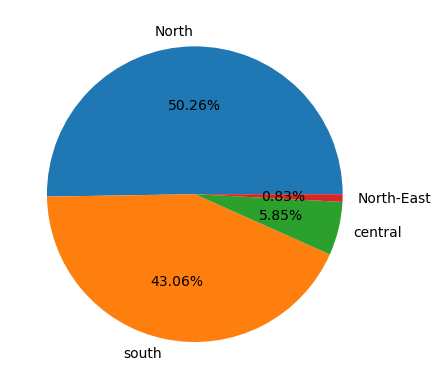

In [83]:
region_names=df.Region.value_counts().index
region_val=df.Region.value_counts().values
plt.pie(region_val,labels=region_names[:],autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x7fe238b23580>,
 [Text(0.41593847309550813, 1.0183296060701454, 'p3'),
  Text(-1.0201060611602613, -0.4115624180900115, 'p4'),
  Text(0.7103225292004668, -0.8399058902700064, 'p1'),
  Text(1.0973637714591258, -0.07611013788585434, 'p2')],
 [Text(0.22687553077936803, 0.5554525124018974, '37.66%'),
  Text(-0.556421487905597, -0.2244885916854608, '36.89%'),
  Text(0.3874486522911637, -0.4581304856018216, '23.25%'),
  Text(0.598562057159523, -0.04151462066501145, '2.20%')])

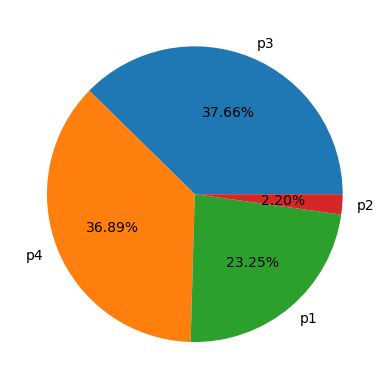

In [84]:
loan_purpose=df.loan_purpose.value_counts().index
val=df.loan_purpose.value_counts().values
plt.pie(val,labels=loan_purpose,autopct='%1.2f%%')

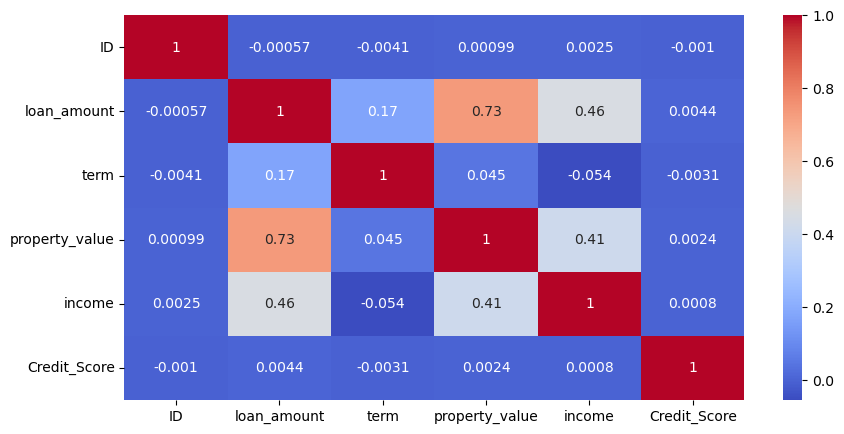

In [85]:
# Get the data types of each column
column_types = df.dtypes

# Select only the numeric columns (assuming 'df' is your DataFrame)
numeric_columns = df.select_dtypes(include=[np.number])

# Create a correlation matrix for the numeric columns
c = numeric_columns.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(c, cmap="coolwarm", annot=True)
plt.show()


In [86]:
df.drop(['ID','term', 'Security_Type'],axis=1,inplace=True)

In [87]:
def detect_outliers(data):
    threshold = 3
    for i in data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            mean = np.mean(data[i])
            std = np.std(data[i])
            z_scores = [(y - mean) / std for y in data[column]]
            data = data[np.abs(z_scores) <= threshold]
        return data
df = detect_outliers(df)
df

,loan_limit,Gender,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,property_value,income,credit_type,Credit_Score,age,Region,risk_category
0,cf,Sex Not Available,type1,p1,l1,nob/c,116500,118000.0,1740.0,EXP,758,25-34,south,High Risk
1,cf,Male,type2,p1,l1,b/c,206500,NaN,4980.0,EQUI,552,55-64,North,High Risk
2,cf,Male,type1,p1,l1,nob/c,406500,508000.0,9480.0,EXP,834,35-44,south,Low Risk
3,cf,Male,type1,p4,l1,nob/c,456500,658000.0,11880.0,EXP,587,45-54,North,Low Risk
4,cf,Joint,type1,p1,l1,nob/c,696500,758000.0,10440.0,CRIF,602,25-34,North,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,type1,p3,l1,nob/c,436500,608000.0,7860.0,CIB,659,55-64,south,Low Risk
148666,cf,Male,type1,p1,l1,nob/c,586500,788000.0,7140.0,CIB,569,25-34,south,Low Risk
148667,cf,Male,type1,p4,l1,nob/c,446500,728000.0,6900.0,CIB,702,45-54,North,Low Risk
148668,cf,Female,type1,p4,l1,nob/c,196500,278000.0,7140.0,EXP,737,55-64,North,Low Risk


In [88]:
# Inputing mull/NaN values
for i in df.columns:       
    if df[i].dtype=='float64' or df[i].dtype=='int64':
        df[i].fillna(df[i].mean(),inplace=True)

    else:
        df[i].fillna(df[i].mode()[0],inplace=True)
        
df

,loan_limit,Gender,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,property_value,income,credit_type,Credit_Score,age,Region,risk_category
0,cf,Sex Not Available,type1,p1,l1,nob/c,116500,118000.000000,1740.0,EXP,758,25-34,south,High Risk
1,cf,Male,type2,p1,l1,b/c,206500,497893.465696,4980.0,EQUI,552,55-64,North,High Risk
2,cf,Male,type1,p1,l1,nob/c,406500,508000.000000,9480.0,EXP,834,35-44,south,Low Risk
3,cf,Male,type1,p4,l1,nob/c,456500,658000.000000,11880.0,EXP,587,45-54,North,Low Risk
4,cf,Joint,type1,p1,l1,nob/c,696500,758000.000000,10440.0,CRIF,602,25-34,North,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,type1,p3,l1,nob/c,436500,608000.000000,7860.0,CIB,659,55-64,south,Low Risk
148666,cf,Male,type1,p1,l1,nob/c,586500,788000.000000,7140.0,CIB,569,25-34,south,Low Risk
148667,cf,Male,type1,p4,l1,nob/c,446500,728000.000000,6900.0,CIB,702,45-54,North,Low Risk
148668,cf,Female,type1,p4,l1,nob/c,196500,278000.000000,7140.0,EXP,737,55-64,North,Low Risk


In [89]:
df.isnull().sum() 

loan_limit                0
Gender                    0
loan_type                 0
loan_purpose              0
Credit_Worthiness         0
business_or_commercial    0
loan_amount               0
property_value            0
income                    0
credit_type               0
Credit_Score              0
age                       0
Region                    0
risk_category             0
dtype: int64

### Data Processing

In [90]:
df['Gender'].replace(['Sex Not Available'],df['Gender'].mode(),inplace=True)

In [91]:
df.to_csv('Preprocessed Data')

In [92]:
print(df.columns)
df.info()

Index(['loan_limit', 'Gender', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'business_or_commercial', 'loan_amount',
       'property_value', 'income', 'credit_type', 'Credit_Score', 'age',
       'Region', 'risk_category'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_limit              148670 non-null  object 
 1   Gender                  148670 non-null  object 
 2   loan_type               148670 non-null  object 
 3   loan_purpose            148670 non-null  object 
 4   Credit_Worthiness       148670 non-null  object 
 5   business_or_commercial  148670 non-null  object 
 6   loan_amount             148670 non-null  int64  
 7   property_value          148670 non-null  float64
 8   income                  148670 non-null  float64
 9   credit_type             148670 

In [93]:
from sklearn.preprocessing import LabelEncoder

categorical_cols =df.select_dtypes(include=['object']).columns
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [94]:
#setting target attribute 'Status'
X=df.drop('risk_category',axis='columns')
Y=df.risk_category 

In [95]:
X

,loan_limit,Gender,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,property_value,income,credit_type,Credit_Score,age,Region
0,0,2,0,0,0,1,116500,118000.000000,1740.0,3,758,0,3
1,0,2,1,0,0,0,206500,497893.465696,4980.0,2,552,3,0
2,0,2,0,0,0,1,406500,508000.000000,9480.0,3,834,1,3
3,0,2,0,3,0,1,456500,658000.000000,11880.0,3,587,2,0
4,0,1,0,0,0,1,696500,758000.000000,10440.0,1,602,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,0,2,0,2,0,1,436500,608000.000000,7860.0,0,659,3,3
148666,0,2,0,0,0,1,586500,788000.000000,7140.0,0,569,0,3
148667,0,2,0,3,0,1,446500,728000.000000,6900.0,0,702,2,0
148668,0,0,0,3,0,1,196500,278000.000000,7140.0,3,737,3,0


In [96]:
Y

0         0
1         0
2         1
3         1
4         1
         ..
148665    1
148666    1
148667    1
148668    1
148669    1
Name: risk_category, Length: 148670, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=True)

In [98]:
X_train

,loan_limit,Gender,loan_type,loan_purpose,Credit_Worthiness,business_or_commercial,loan_amount,property_value,income,credit_type,Credit_Score,age,Region
118686,0,2,0,2,0,1,196500,268000.0,6600.000000,3,523,0,3
4568,0,1,0,3,0,1,286500,408000.0,10860.000000,1,607,2,0
83187,0,1,0,2,0,1,476500,998000.0,8040.000000,0,634,3,0
140392,0,2,0,3,0,1,496500,568000.0,10140.000000,0,657,1,3
142764,0,2,2,3,0,1,376500,558000.0,6957.338876,3,659,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,0,2,0,3,0,1,586500,858000.0,6780.000000,3,576,0,3
109259,0,2,0,3,0,1,496500,588000.0,9180.000000,0,876,2,0
50057,0,2,1,2,0,0,306500,358000.0,3900.000000,1,556,1,3
5192,0,2,1,2,0,0,316500,358000.0,5040.000000,0,679,1,3


In [99]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118936 entries, 118686 to 128037
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_limit              118936 non-null  int64  
 1   Gender                  118936 non-null  int64  
 2   loan_type               118936 non-null  int64  
 3   loan_purpose            118936 non-null  int64  
 4   Credit_Worthiness       118936 non-null  int64  
 5   business_or_commercial  118936 non-null  int64  
 6   loan_amount             118936 non-null  int64  
 7   property_value          118936 non-null  float64
 8   income                  118936 non-null  float64
 9   credit_type             118936 non-null  int64  
 10  Credit_Score            118936 non-null  int64  
 11  age                     118936 non-null  int64  
 12  Region                  118936 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 12.7 MB


In [100]:
with open('training_data.pkl', 'wb') as file:
    pickle.dump((X_train, X_test, y_train, y_test), file)

### Applying ML Models

In [101]:
# Applying KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [102]:
y_pred_knn = knn.predict(X_test)

In [103]:
y_pred_knn

array([1, 1, 1, ..., 1, 1, 1])

In [104]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy * 100:.2f}%")

K-Nearest Neighbors Accuracy: 83.79%


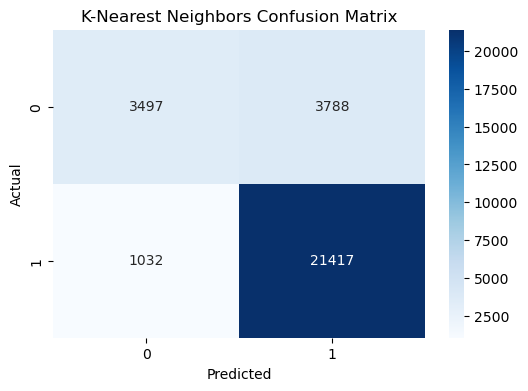

In [105]:
knn_confusion = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(knn_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [106]:
# Print KNN classification report
knn_classification_report = classification_report(y_test, y_pred_knn)
print("K-Nearest Neighbors Classification Report:")
print(knn_classification_report)

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.48      0.59      7285
           1       0.85      0.95      0.90     22449

    accuracy                           0.84     29734
   macro avg       0.81      0.72      0.75     29734
weighted avg       0.83      0.84      0.82     29734



In [107]:
# Applying Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb=gnb.predict(X_test)

In [108]:
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
print(f"Gaussian Naive Bayes Accuracy: {gnb_accuracy * 100:.2f}%")

Gaussian Naive Bayes Accuracy: 74.96%


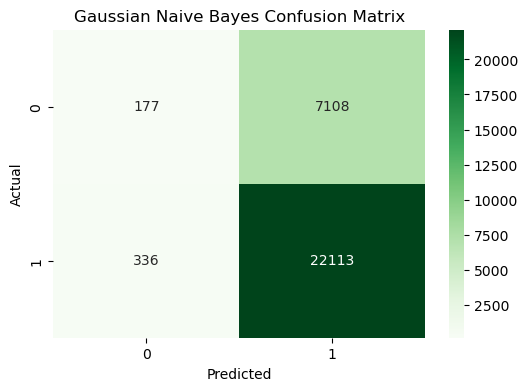

In [109]:
gnb_confusion = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(6, 4))
sns.heatmap(gnb_confusion, annot=True, fmt='d', cmap='Greens')
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

RISK STRATEFICATION

In [110]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [111]:
rf_predictions = rf_model.predict(X_test)

In [112]:
rf_predictions 

array([1, 1, 1, ..., 1, 1, 1])

In [113]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Classifier: {rf_accuracy * 100:.2f}%")

Random Forest Classifier: 86.28%


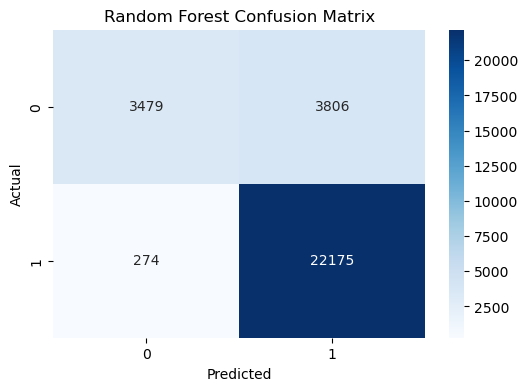

In [114]:
rf_confusion = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(rf_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [115]:
# Print rf classification report
rf_classification_report = classification_report(y_test, rf_predictions)
print("Random Forest Classification Report:")
print(rf_classification_report)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.48      0.63      7285
           1       0.85      0.99      0.92     22449

    accuracy                           0.86     29734
   macro avg       0.89      0.73      0.77     29734
weighted avg       0.87      0.86      0.85     29734



In [116]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [117]:
gb_predictions = gb_model.predict(X_test)
gb_predictions 

array([1, 1, 1, ..., 1, 1, 1])

In [118]:
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f"Gradient Boosting Classifier: {gb_accuracy * 100:.2f}%")

Gradient Boosting Classifier: 86.30%


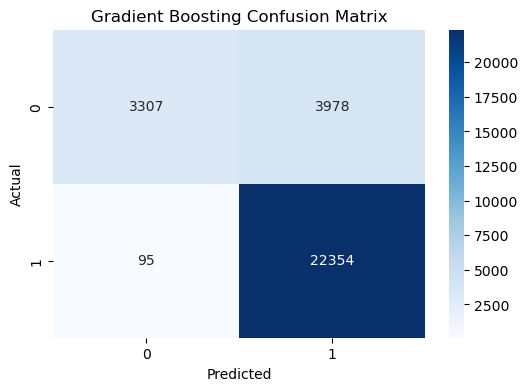

In [119]:
gb_confusion = confusion_matrix(y_test, gb_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(gb_confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [120]:
# Print gb classification report
gb_classification_report = classification_report(y_test, gb_predictions)
print("Gradient Boosting Classification Report:")
print(gb_classification_report)

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.45      0.62      7285
           1       0.85      1.00      0.92     22449

    accuracy                           0.86     29734
   macro avg       0.91      0.72      0.77     29734
weighted avg       0.88      0.86      0.84     29734



In [121]:
from fairlearn.metrics import demographic_parity_difference

# Evaluate fairness using demographic parity difference
gender_column = X_test['Gender']  # Replace with the actual column containing gender information
region_column = X_test['Region']  # Replace with the actual column containing region information
age_column = X_test['age'] 

demographic_parity_diff_gender = demographic_parity_difference(y_test, rf_predictions, sensitive_features=gender_column)
demographic_parity_diff_region = demographic_parity_difference(y_test, rf_predictions, sensitive_features=region_column)
demographic_parity_diff_age = demographic_parity_difference(y_test, rf_predictions, sensitive_features=age_column)

print("Demographic Parity Difference (Gender):", demographic_parity_diff_gender)
print("Demographic Parity Difference (Region):", demographic_parity_diff_region)
print("Demographic Parity Difference (age):", demographic_parity_diff_age)


Demographic Parity Difference (Gender): 0.05102631045756767
Demographic Parity Difference (Region): 0.03715225156505697
Demographic Parity Difference (age): 0.06197488054829747


In [122]:
from fairlearn.metrics import equalized_odds_difference

# Assuming 'age' is a continuous variable
# Convert 'age' to binary based on a threshold
age_threshold = 30  # Adjust the threshold as needed
age_column_binary = (X_test['age'] > age_threshold).astype(int)

# Evaluate fairness using equalized odds difference
equalized_odds_diff_age = equalized_odds_difference(y_test, rf_predictions, sensitive_features=age_column_binary)

print("Equalized Odds Difference (Age):", equalized_odds_diff_age)


Equalized Odds Difference (Age): 0.0
